# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import configparser
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import seaborn as sns


df_arc = pd.read_csv("twitter-archive-enhanced.csv")

df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os
if not os.path.exists('tweet_image_predictions'):
    os.makedirs('tweet_image_predictions')
    
resp_req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(resp_req.content)

df_picture = pd.read_csv('image-predictions.tsv', sep='\t')

df_picture.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
with open(os.path.join('tweet_image_predictions','https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'.split('/')[-1]), mode='wb') as file:
    file.write(resp_req.content)
    
os.listdir('tweet_image_predictions')

df_pred = pd.read_csv('tweet_image_predictions' + '/image-predictions.tsv', sep='\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import json
temp_list = []

for line in open('tweet-json.txt', 'r'):
    tw_data = json.loads(line)
    temp_list.append({'tweet_id': tw_data['id_str'],
                        'retweet_count': tw_data['retweet_count'],
                        'favorite_count': tw_data['favorite_count'],
                        'followers_count': tw_data['user']['followers_count'],
                        
       
                         })
    
tw_data = pd.DataFrame(temp_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])    

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
tw_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [7]:
tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [8]:
tw_data.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [9]:
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
sum(df_arc.duplicated())

0

In [11]:
df_arc.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [12]:
df_arc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
print(df_picture.p1_conf.min(),df_picture.p1_conf.max())

0.0443334 1.0


In [15]:
df_picture.jpg_url.value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                       

In [16]:
df_picture.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
499,675822767435051008,https://pbs.twimg.com/media/CWEBOFYWwAA-O2c.jpg,1,Pomeranian,0.460710,True,chow,0.202765,True,Pekinese,0.133266,True
1340,758740312047005698,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1,Chesapeake_Bay_retriever,0.848514,True,Labrador_retriever,0.110054,True,curly-coated_retriever,0.025201,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True


In [17]:
df_picture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_picture.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues
1. Wrong names

2. There are many record with wrong data, just 1 character for URL link (For example: n,t,y,...)

3. Type of timestamp is wrong

4. Type of tweet_id is wrong

5. There are some ratings (no retweets) that dont have images

6. There are duplicate url in image_prd.

7. There are  mixed up capital and lower cases in p1,p2,p3 columns

8. There are some records have more than one dog stage









### Tidiness issues
1. We should merge some dataframe into one
   

2. Remove value null

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
#  copies from original  data
clean_df = df_arc.copy()
clean_image_df = df_picture.copy()
clean_tw_df = tw_data.copy()

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
clean_image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
clean_tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Issue #1:

#### Define: Keep original ratings (no retweets) that have images

#### Code

In [23]:
clean_df = clean_df[pd.isnull(clean_df['retweeted_status_user_id'])]

#### Test

In [24]:
print(sum(clean_df.retweeted_status_user_id.value_counts()))

0


### Issue #2:

#### Define : There are duplicate url in image_prd.

#### Code

In [25]:
clean_image_df = clean_image_df.drop_duplicates(subset=['jpg_url'], keep=False)

#### Test

In [26]:
sum(clean_image_df['jpg_url'].duplicated())

0

### Issue #3:

#### Define : There are  mixed up capital and lower cases in p1,p2,p3 columns

#### Code

In [27]:
clean_image_df['p1'] = clean_image_df.p1.str.lower()
clean_image_df['p2'] = clean_image_df.p2.str.lower()
clean_image_df['p3'] = clean_image_df.p3.str.lower()

#### Test

In [28]:
clean_image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #4: Remove some columns that  are unnecessary

#### Code


In [29]:
clean_df = clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test


In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #5: There are some records have more than one dog stage

#### Code

In [31]:
#check dog stages
clean_df.doggo.replace('None', '', inplace=True)
clean_df.floofer.replace('None', '', inplace=True)
clean_df.pupper.replace('None', '', inplace=True)
clean_df.puppo.replace('None', '', inplace=True)

In [32]:
clean_df['add_all'] = clean_df.doggo + clean_df.floofer + clean_df.pupper + clean_df.puppo

#### Test

In [33]:
#clean_df['add_all'].duplicated()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
add_all               2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #6: There are some wrong names

#### Code

In [34]:
clean_df['name'].replace(['a','an','the'],['None','None','None'],inplace=True)

#### Test

In [35]:
print(len(clean_df[(clean_df['name'] == 'a')]),
len(clean_df[(clean_df['name'] == 'an')]),
len(clean_df[(clean_df['name'] == 'the')]))

0 0 0


### Issue #7: Timestamp type shoud be datatime 

#### Code

In [36]:
clean_df.timestamp = pd.to_datetime(clean_df['timestamp'])

#### Test

In [37]:
print(clean_df.timestamp.dtypes)

datetime64[ns]


### Issue #8: Type of tweet_id is shoule be string. 


#### Code

In [38]:
clean_tw_df['tweet_id'] = clean_tw_df['tweet_id'].astype(str)

#### Test

In [39]:
print(clean_tw_df.tweet_id.dtypes)

object


## Tidiness. 

### Merge into one dataframe


In [40]:
merge_df = pd.concat([clean_df,clean_image_df], join = 'outer', axis = 1)

In [41]:
#df_total = pd.merge(merge_df, clean_tw_df, on='tweet_id')
df_total =  pd.concat([merge_df,clean_tw_df], join = 'outer', axis = 1)

### Test

In [42]:
df_total.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,followers_count
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,892420643555336193,8853.0,39467.0,3200889.0
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,892177421306343426,6514.0,33819.0,3200889.0
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,...,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328.0,25461.0,3200889.0
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964.0,42908.0,3200889.0
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,...,rottweiler,0.243682,True,doberman,0.154629,True,891327558926688256,9774.0,41048.0,3200889.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
df_total.to_csv('twitter_archive_master.csv', index=False)

In [44]:
df_total.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count,followers_count
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,892420643555336193,8853.0,39467.0,3200889.0
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,892177421306343426,6514.0,33819.0,3200889.0
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,...,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,4328.0,25461.0,3200889.0
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,8964.0,42908.0,3200889.0
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,...,rottweiler,0.243682,True,doberman,0.154629,True,891327558926688256,9774.0,41048.0,3200889.0


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [45]:
final_df = pd.read_csv("twitter_archive_master.csv")
final_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,retweet_count,favorite_count,followers_count
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,8.924206e+17,8853.0,39467.0,3200889.0
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,8.921774e+17,6514.0,33819.0,3200889.0
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,...,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4328.0,25461.0,3200889.0
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8964.0,42908.0,3200889.0
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,...,rottweiler,0.243682,True,doberman,0.154629,True,8.913276e+17,9774.0,41048.0,3200889.0


#### 1. How about the rating?

In [46]:
final_df['rating_numerator'].mean()

13.215172413793104

In [47]:
final_df['rating_numerator'].describe()

count    2175.000000
mean       13.215172
std        47.725696
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [48]:
final_df['rating_denominator'].mean()

10.49287356321839

In [49]:
final_df['rating_denominator'].describe()

count    2175.000000
mean       10.492874
std         7.019084
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### 2. How many dogs are rating above and under 13?

In [50]:
rateabove13 = final_df['rating_numerator'][final_df['rating_numerator']>13].value_counts().sum()
print(rateabove13)

69


In [51]:
rateunder13 = final_df['rating_numerator'][final_df['rating_numerator']<13].value_counts().sum()
print(rateunder13)

1799


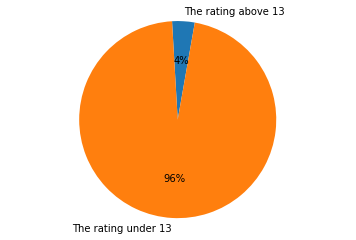

In [52]:
fig, ax = plt.subplots()
ax.pie([rateabove13, rateunder13], labels=['The rating above 13', 'The rating under 13'], autopct='%1.f%%', shadow=False, startangle=80)
ax.axis('Equal')  

plt.show()

#### 3. Which is the popular dog name?

In [53]:
final_df['name'].value_counts()

None         749
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Daisy          7
Toby           7
Bo             6
Bailey         6
Jax            6
Bella          6
Stanley        6
Oscar          6
Koda           6
Chester        5
Louis          5
Dave           5
Leo            5
Scout          5
Buddy          5
Milo           5
Rusty          5
Bentley        5
very           4
Duke           4
            ... 
Chloe          1
Iroh           1
Dotsy          1
Harrison       1
Snickers       1
Baron          1
Benny          1
Jerome         1
Zoe            1
Stu            1
Hall           1
Howie          1
Izzy           1
Boots          1
Luther         1
Napolean       1
Tupawc         1
Lili           1
Noah           1
Aubie          1
Shikha         1
Fido           1
Jarvis         1
Apollo         1
by             1
Mason          1
Laika          1
Lugan         

### Insights:
1. The average rating point is 13

2. There is 69 dogs have rating above 13 and 1799 dogs under 13.

3. Lucy and Charlie are the most popular name of dog.

### Visualization

#### 1. Top 10 Popular Given Dog Names

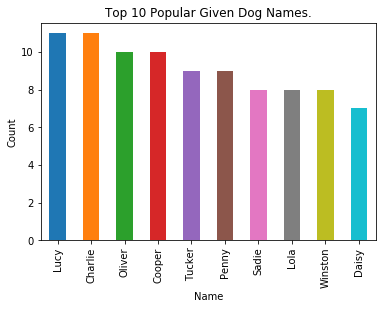

In [54]:
final_df['name'].value_counts()[1:11].plot(kind = 'bar', title = 'Top 10 Popular Given Dog Names.')
plt.xlabel('Name')
plt.ylabel('Count');